# In this notebook, we will conduct some time series analysis to highlight any noticable trends between weather, air quality, production, and drilling data

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
import math
import os
from windrose import WindroseAxes

# Configure Notebook
%matplotlib inline
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read all the required data
# Path of working directory
working_path = os.path.abspath(os.getcwd())
# Path of parent directory
path_one_level_back = os.path.dirname(working_path)
# Define paths for production volume file
path_AQ = os.path.join(path_one_level_back, '2-Analysis', 'FarmingtonCommunityHall_AQ.csv')
path_weather = os.path.join(path_one_level_back, '2-Analysis', 'weather_data.csv')
path_drill = os.path.join(path_one_level_back, '2-Analysis', 'drill_final.csv')
path_prod_daily = os.path.join(path_one_level_back, '2-Analysis', 'production_daily.csv')
path_prod_monthly = os.path.join(path_one_level_back, '2-Analysis', 'production_monthly.csv')
AQ_data =  pd.read_csv(path_AQ, header=[0])
weather_data =  pd.read_csv(path_weather, header=[0])
drill_data =  pd.read_csv(path_drill, header=[0])
production_data_daily =  pd.read_csv(path_prod_daily, header=[0])
production_data_monthly =  pd.read_csv(path_prod_monthly, header=[0])

# Hourly Trends

# Weather Hourly Trends

In [3]:
#Convert the Datetime coloumn to datetime format and get the mean weather data for each hour
weather_data['Datetime']=  pd.to_datetime(weather_data['Datetime'])
weather_data_hours = weather_data.groupby(weather_data['Datetime'].dt.hour).mean()
weather_data_hours.head()

,TEMP_MEAN_(C),WDIR_VECT_(DEG),WSPD_SCLR_(M/S),HUMIDITY_(%)
Datetime,,,,
0,0.294063,244.459278,2.123801,74.303769
1,-0.031115,247.748012,2.130527,75.440733
2,-0.327553,248.271326,2.108055,76.340289
3,-0.587494,248.282871,2.107847,77.109734
4,-0.808202,248.841267,2.130562,77.693323


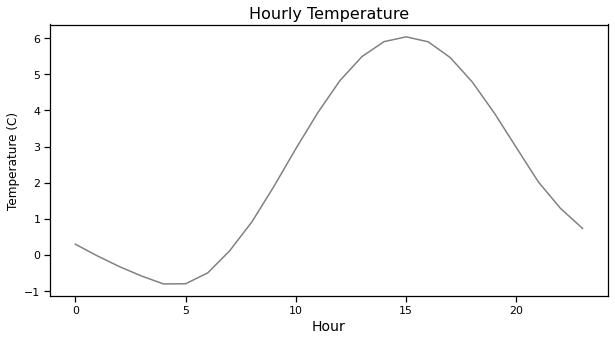

In [4]:
#Plot hourly temperature
plt.figure(figsize = (10,5))
plt.plot(weather_data_hours.index, weather_data_hours['TEMP_MEAN_(C)'], 'gray')
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('Temperature (C)')
plt.title('Hourly Temperature', fontsize = 16)
plt.show()

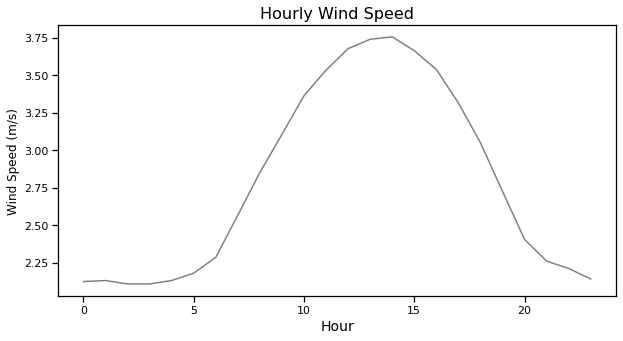

In [5]:
#Plot hourly wind speed
plt.figure(figsize = (10,5))
plt.plot(weather_data_hours.index, weather_data_hours['WSPD_SCLR_(M/S)'], 'gray')
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('Wind Speed (m/s)')
plt.title('Hourly Wind Speed', fontsize = 16)
plt.show()

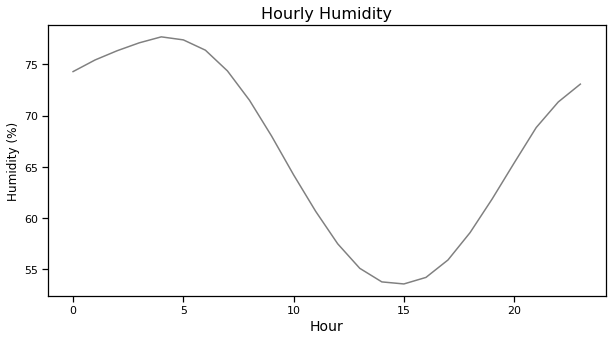

In [6]:
#Plot hourly humidity
plt.figure(figsize = (10,5))
plt.plot(weather_data_hours.index, weather_data_hours['HUMIDITY_(%)'], 'gray')
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('Humidity (%)')
plt.title('Hourly Humidity', fontsize = 16)
plt.show()

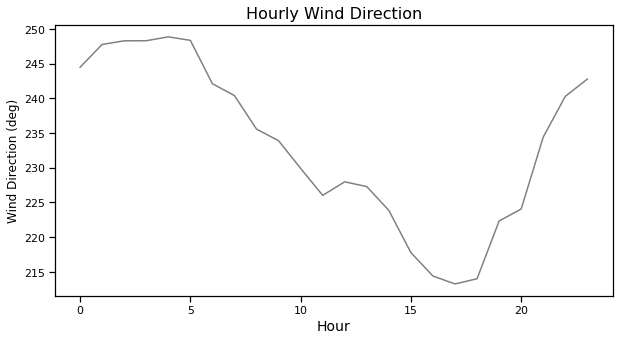

In [7]:
#Plot hourly wind direction
plt.figure(figsize = (10,5))
plt.plot(weather_data_hours.index, weather_data_hours['WDIR_VECT_(DEG)'], 'gray')
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('Wind Direction (deg)')
plt.title('Hourly Wind Direction', fontsize = 16)
plt.show()

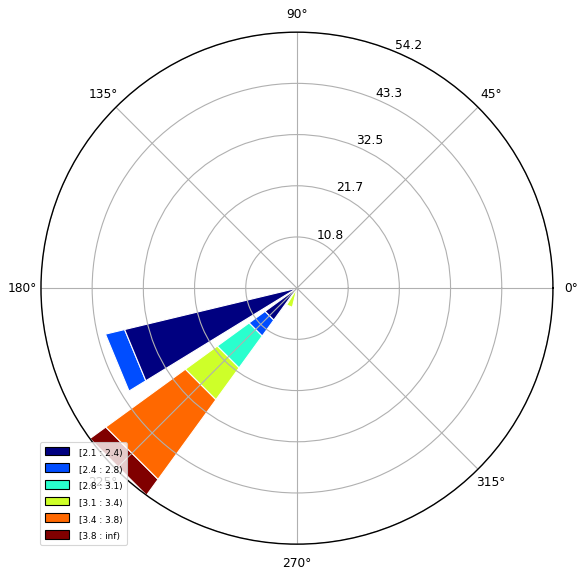

In [8]:
#Plot wind rose
ax = WindroseAxes.from_ax()
ax.bar(weather_data_hours['WDIR_VECT_(DEG)'], weather_data_hours['WSPD_SCLR_(M/S)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

Based on the wind rose we can see that the weather direction is mainly from the south west

<b>While the weather data alone shows some trend of how the weather components are changing throughout the day, to get the bigger picture we will plot the hourly Air quality data trends and compare them with hourly weather data </b>

In [9]:
#Convert the Datetime coloumn to datetime format and get the mean AQ data for each hour
AQ_data['Datetime']=  pd.to_datetime(AQ_data['Datetime'])
AQ_data_hours = AQ_data.groupby(AQ_data['Datetime'].dt.hour).mean()
AQ_data_hours.head()

,NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,
0,3.630754,0.356070,0.681720,2.947802,0.547685,21.776933
1,3.644869,0.339122,0.761573,2.883910,0.542205,21.483040
2,3.483088,0.330345,0.742517,2.744691,0.530723,21.017005
3,3.486634,0.322305,0.775566,2.713120,0.530913,20.767604
4,3.581306,0.331497,0.859274,2.724715,0.535768,20.832063


Since NO, NO2, and NOx are the same species then they can be plotted together on the same graph
And since SO2 and TRS are the same species then they can be plotted together on the same graph

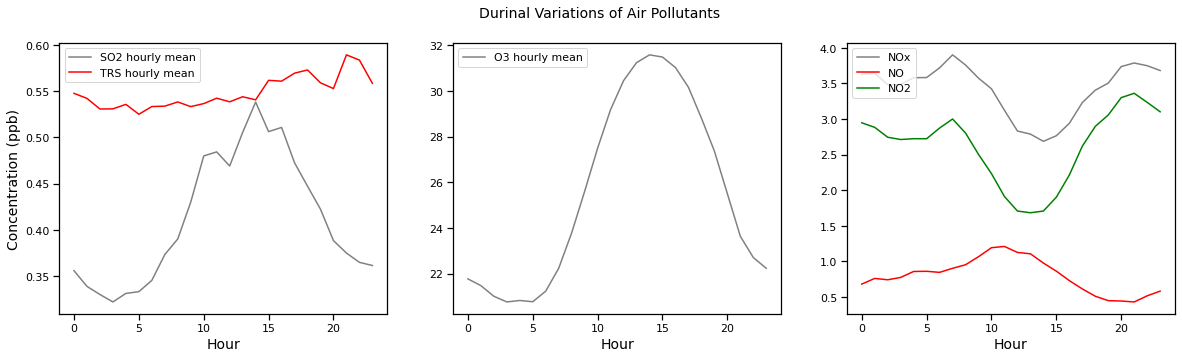

In [10]:
# Plot line plots of hourly data for all AQ components
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle("Durinal Variations of Air Pollutants", fontsize=14)
#TRS and SO2 are in the same plot since they are similar species and similar concentrations
ax1.plot(AQ_data_hours.index, AQ_data_hours['SO2'], 'gray', label = 'SO2 hourly mean')
ax1.plot(AQ_data_hours.index, AQ_data_hours['TRS'], 'r', label = 'TRS hourly mean')
ax1.set_xlabel("Hour",fontsize=14)
ax1.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
ax1.legend(loc='upper left')
#Plot hourly ozone level
ax2.plot(AQ_data_hours.index, AQ_data_hours['O3'], 'gray', label = 'O3 hourly mean')
ax2.set_xlabel("Hour",fontsize=14)
ax2.legend(loc='upper left')

#NOx,NO2 ,and NO are in the same plot since they are similar species and similar concentrations
ax3.plot(AQ_data_hours.index, AQ_data_hours['NOx'], 'gray', label = 'NOx')
ax3.plot(AQ_data_hours.index, AQ_data_hours['NO'], 'r', label = 'NO')
ax3.plot(AQ_data_hours.index, AQ_data_hours['NO2'], 'green', label = 'NO2')
ax3.set_xlabel("Hour",fontsize=14)
ax3.legend(loc='upper left')


plt.show()

Now that we have hourly AQ trends, let's plot them against weather data. We will only take into account humidity and temperatrue since wind will be disregarded in the model

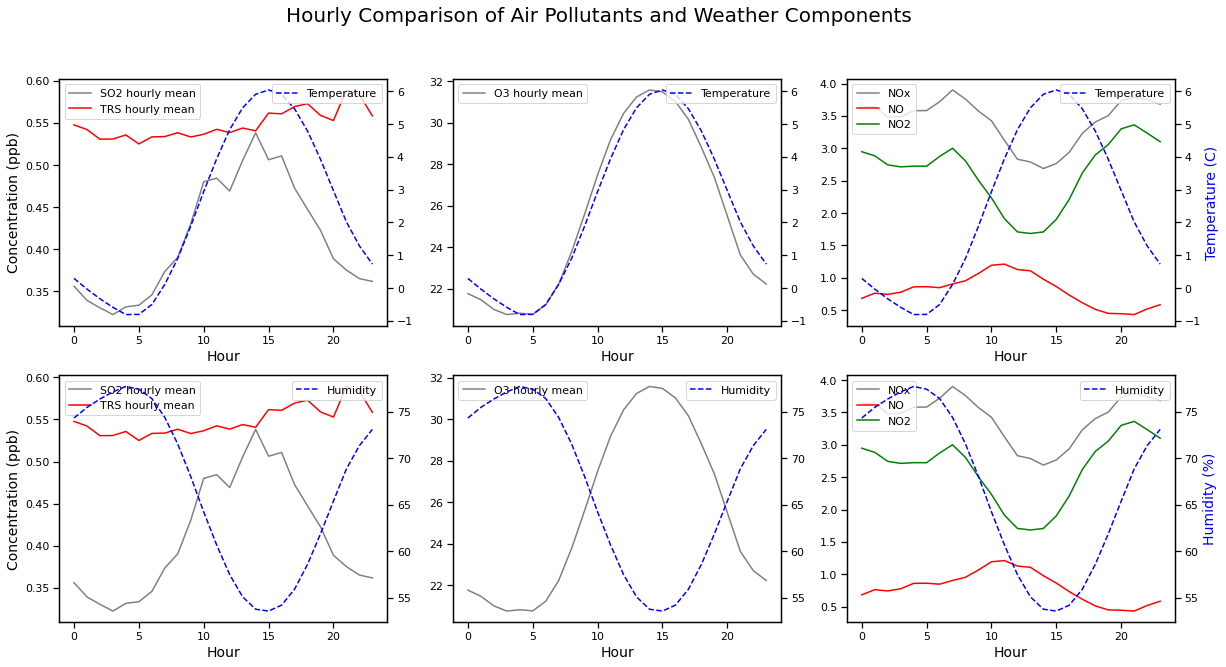

In [11]:
# Plot line plots of hourly data for all AQ components against Temperature and Humidity
# create figure and axis objects with subplots()
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.suptitle("Hourly Comparison of Air Pollutants and Weather Components", fontsize=20)

# make a plot
axs[0,0].plot(AQ_data_hours.index, AQ_data_hours['SO2'], 'gray', label = 'SO2 hourly mean')
axs[0,0].plot(AQ_data_hours.index, AQ_data_hours['TRS'], 'r', label = 'TRS hourly mean')
# twin object for two different y-axis on the sample plot
ax2=axs[0,0].twinx()
ax2.plot(weather_data_hours.index, weather_data_hours['TEMP_MEAN_(C)'], linestyle='dashed', color = 'blue', label = 'Temperature')
# set x-axis and y-axis label
axs[0,0].set_xlabel("Hour",fontsize=14)
axs[0,0].set_ylabel("Concentration (ppb)",color="black",fontsize=14)
axs[0,0].legend(loc='upper left')
ax2.legend(loc='upper right')

# make a plot
axs[0,1].plot(AQ_data_hours.index, AQ_data_hours['O3'], 'gray', label = 'O3 hourly mean')
# twin object for two different y-axis on the sample plot
ax2=axs[0,1].twinx()
ax2.plot(weather_data_hours.index, weather_data_hours['TEMP_MEAN_(C)'], linestyle='dashed', color = 'blue', label = 'Temperature')
# set x-axis and y-axis label
axs[0,1].set_xlabel("Hour",fontsize=14)
axs[0,1].legend(loc='upper left')
ax2.legend(loc='upper right')

# make a plot
axs[0,2].plot(AQ_data_hours.index, AQ_data_hours['NOx'], 'gray', label = 'NOx')
axs[0,2].plot(AQ_data_hours.index, AQ_data_hours['NO'], 'r', label = 'NO')
axs[0,2].plot(AQ_data_hours.index, AQ_data_hours['NO2'], 'green', label = 'NO2')
# twin object for two different y-axis on the sample plot
ax2=axs[0,2].twinx()
ax2.plot(weather_data_hours.index, weather_data_hours['TEMP_MEAN_(C)'], linestyle='dashed', color = 'blue', label = 'Temperature')
# set x-axis and y-axis label
axs[0,2].set_xlabel("Hour",fontsize=14)
ax2.set_ylabel("Temperature (C)",color="blue",fontsize=14)
axs[0,2].legend(loc='upper left')
ax2.legend(loc='upper right')

# make a plot
axs[1,0].plot(AQ_data_hours.index, AQ_data_hours['SO2'], 'gray', label = 'SO2 hourly mean')
axs[1,0].plot(AQ_data_hours.index, AQ_data_hours['TRS'], 'r', label = 'TRS hourly mean')
# twin object for two different y-axis on the sample plot
ax2=axs[1,0].twinx()
ax2.plot(weather_data_hours.index, weather_data_hours['HUMIDITY_(%)'], linestyle='dashed', color = 'blue', label = 'Humidity')
# set x-axis and y-axis label
axs[1,0].set_xlabel("Hour",fontsize=14)
axs[1,0].set_ylabel("Concentration (ppb)",color="black",fontsize=14)
axs[1,0].legend(loc='upper left')
ax2.legend(loc='upper right')

# make a plot
axs[1,1].plot(AQ_data_hours.index, AQ_data_hours['O3'], 'gray', label = 'O3 hourly mean')
ax2=axs[1,1].twinx()
# twin object for two different y-axis on the sample plot
ax2.plot(weather_data_hours.index, weather_data_hours['HUMIDITY_(%)'], linestyle='dashed', color = 'blue', label = 'Humidity')
# set x-axis and y-axis label
axs[1,1].set_xlabel("Hour",fontsize=14)
axs[1,1].legend(loc='upper left')
ax2.legend(loc='upper right')

# make a plot
axs[1,2].plot(AQ_data_hours.index, AQ_data_hours['NOx'], 'gray', label = 'NOx')
axs[1,2].plot(AQ_data_hours.index, AQ_data_hours['NO'], 'r', label = 'NO')
axs[1,2].plot(AQ_data_hours.index, AQ_data_hours['NO2'], 'green', label = 'NO2')
ax2=axs[1,2].twinx()
# twin object for two different y-axis on the sample plot
ax2.plot(weather_data_hours.index, weather_data_hours['HUMIDITY_(%)'], linestyle='dashed', color = 'blue', label = 'Humidity')
# set x-axis and y-axis label
axs[1,2].set_xlabel("Hour",fontsize=14)
ax2.set_ylabel("Humidity (%)",color="blue",fontsize=14)
axs[1,2].legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig('Diurnal_trends1.png')
plt.show()


Zooming in on each air pollutants and temperature alone

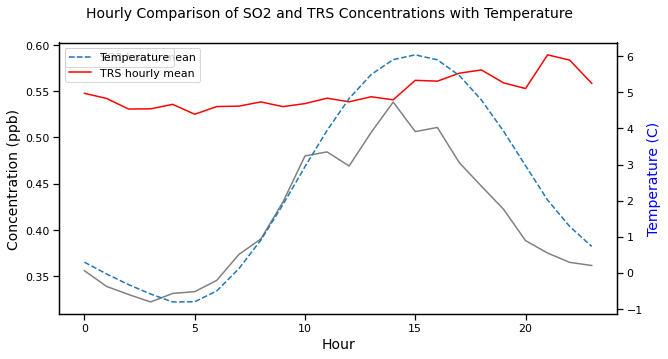

In [12]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_data_hours.index, AQ_data_hours['SO2'], 'gray', label = 'SO2 hourly mean')
ax.plot(AQ_data_hours.index, AQ_data_hours['TRS'], 'r', label = 'TRS hourly mean')
# set x-axis label
ax.set_xlabel("Hour",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(weather_data_hours.index, weather_data_hours['TEMP_MEAN_(C)'], '--', label = 'Temperature')
ax2.set_ylabel("Temperature (C)",color="blue",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper left')
ax.set(facecolor = "white")
fig.suptitle("Hourly Comparison of SO2 and TRS Concentrations with Temperature", fontsize=14)
plt.show()

We can see there is some trend between SO2 and temperature but not TRS

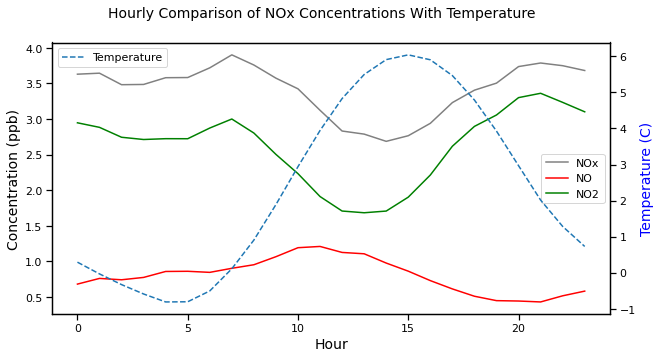

In [13]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_data_hours.index, AQ_data_hours['NOx'], 'gray', label = 'NOx')
ax.plot(AQ_data_hours.index, AQ_data_hours['NO'], 'r', label = 'NO')
ax.plot(AQ_data_hours.index, AQ_data_hours['NO2'], 'green', label = 'NO2')
# set x-axis label
ax.set_xlabel("Hour",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(weather_data_hours.index, weather_data_hours['TEMP_MEAN_(C)'], '--', label = 'Temperature')
ax2.set_ylabel("Temperature (C)",color="blue",fontsize=14)
ax.legend()
ax2.legend(loc='upper left')
fig.suptitle("Hourly Comparison of NOx Concentrations With Temperature", fontsize=14)
plt.show()

The trend between NOx and NO2 are inverse that of temperature whereas NO has a similar trend that of temperature

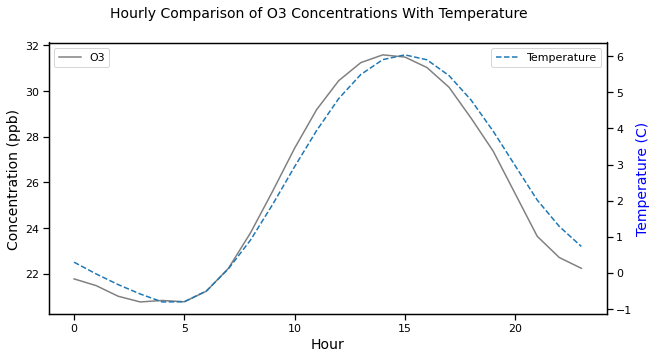

In [14]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_data_hours.index, AQ_data_hours['O3'], 'gray', label = 'O3')
# set x-axis label
ax.set_xlabel("Hour",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(weather_data_hours.index, weather_data_hours['TEMP_MEAN_(C)'], '--', label = 'Temperature')
ax2.set_ylabel("Temperature (C)",color="blue",fontsize=14)
ax.legend(loc='upper left')
ax2.legend()
fig.suptitle("Hourly Comparison of O3 Concentrations With Temperature", fontsize=14)
plt.show()

The trend between and ozone is almost the same! Which makes sense becuase ozone forms at higher temperature

Now focusing on humidity and air quality

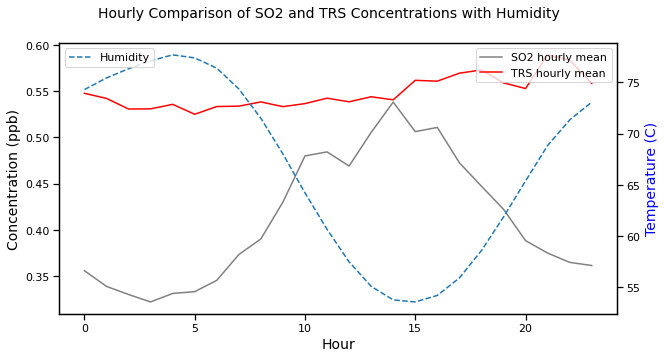

In [15]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_data_hours.index, AQ_data_hours['SO2'], 'gray', label = 'SO2 hourly mean')
ax.plot(AQ_data_hours.index, AQ_data_hours['TRS'], 'r', label = 'TRS hourly mean')
# set x-axis label
ax.set_xlabel("Hour",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(weather_data_hours.index, weather_data_hours['HUMIDITY_(%)'], '--', label = 'Humidity')
ax2.set_ylabel("Temperature (C)",color="blue",fontsize=14)
ax.legend(loc='upper right')
ax2.legend(loc='upper left')
ax.set(facecolor = "white")
fig.suptitle("Hourly Comparison of SO2 and TRS Concentrations with Humidity", fontsize=14)
plt.show()

There is an inverse trend between SO2 and Humidity, and this makes sense because water vapor (humidity) reacts with SO2 in the atmosphere

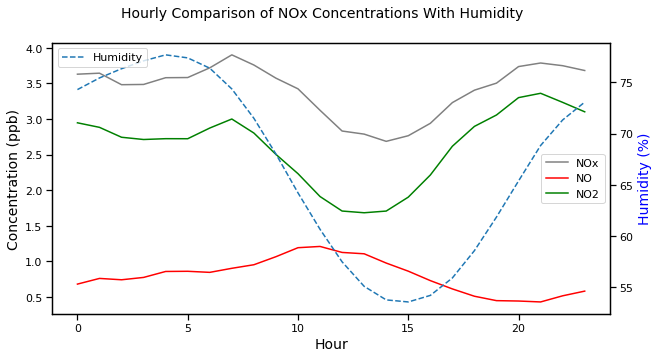

In [16]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_data_hours.index, AQ_data_hours['NOx'], 'gray', label = 'NOx')
ax.plot(AQ_data_hours.index, AQ_data_hours['NO'], 'r', label = 'NO')
ax.plot(AQ_data_hours.index, AQ_data_hours['NO2'], 'g', label = 'NO2')
# set x-axis label
ax.set_xlabel("Hour",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(weather_data_hours.index, weather_data_hours['HUMIDITY_(%)'], '--', label = 'Humidity')
ax2.set_ylabel("Humidity (%)",color="blue",fontsize=14)
ax.legend()
ax2.legend(loc='upper left')
fig.suptitle("Hourly Comparison of NOx Concentrations With Humidity", fontsize=14)
plt.show()

There is an inverse trend between NOx and NO2 and Humidity, and this makes sense because water vapor (humidity) reacts with NOx and NO2 in the atmosphere, and one of the products formed is NO

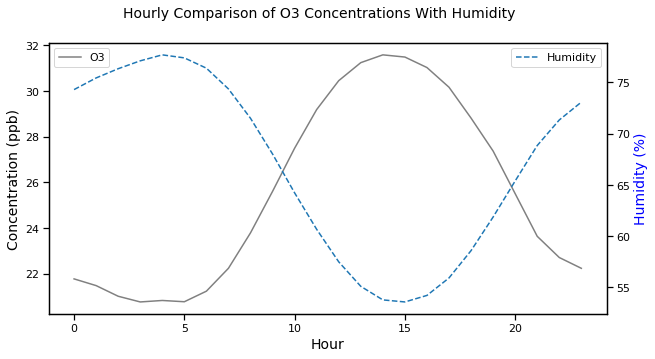

In [17]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_data_hours.index, AQ_data_hours['O3'], 'gray', label = 'O3')
# set x-axis label
ax.set_xlabel("Hour",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(weather_data_hours.index, weather_data_hours['HUMIDITY_(%)'], '--', label = 'Humidity')
ax2.set_ylabel("Humidity (%)",color="blue",fontsize=14)
ax.legend(loc='upper left')
ax2.legend()
fig.suptitle("Hourly Comparison of O3 Concentrations With Humidity", fontsize=14)
plt.show()

There is an inverse trend between Ozone and Humidity, and this makes sense because water vapor (humidity) reacts with air pollutants to form ozone

# Daily Trends

Now lets check the daily trends for air quality

In [18]:
#Resample Air quality data to daily and monthly period
AQ_data = AQ_data.set_index('Datetime')
AQ_data_daily = AQ_data.resample('D').mean()
AQ_data_monthly = AQ_data.resample('M').mean()

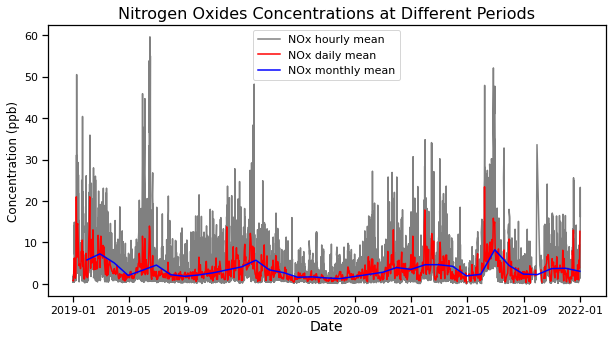

In [19]:
#plot hourly, daily, and monthly periods for air quality
plt.figure(figsize = (10,5))

plt.plot(AQ_data.index, AQ_data['NOx'], 'gray', label = 'NOx hourly mean')
plt.plot(AQ_data_daily.index, AQ_data_daily['NOx'], 'r', label = 'NOx daily mean')
plt.plot(AQ_data_monthly.index, AQ_data_monthly['NOx'], 'b', label = 'NOx monthly mean')

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Concentration (ppb)')
plt.title('Nitrogen Oxides Concentrations at Different Periods', fontsize = 16)
plt.legend()
plt.show()

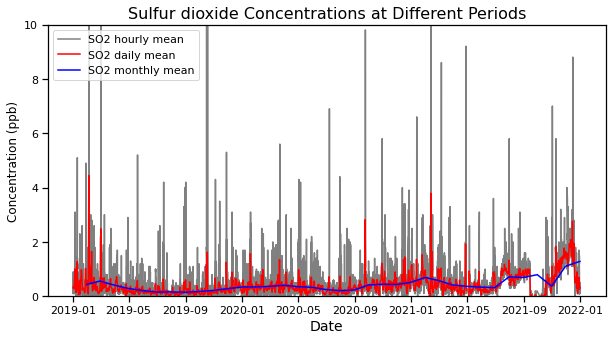

In [20]:
#plot hourly, daily, and monthly periods for air quality
plt.figure(figsize = (10,5))

plt.plot(AQ_data.index, AQ_data['SO2'], 'gray', label = 'SO2 hourly mean')
plt.plot(AQ_data_daily.index, AQ_data_daily['SO2'], 'r', label = 'SO2 daily mean')
plt.plot(AQ_data_monthly.index, AQ_data_monthly['SO2'], 'b', label = 'SO2 monthly mean')

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Concentration (ppb)')
plt.title('Sulfur dioxide Concentrations at Different Periods', fontsize = 16)
plt.ylim(0, 10)
plt.legend()
plt.show()

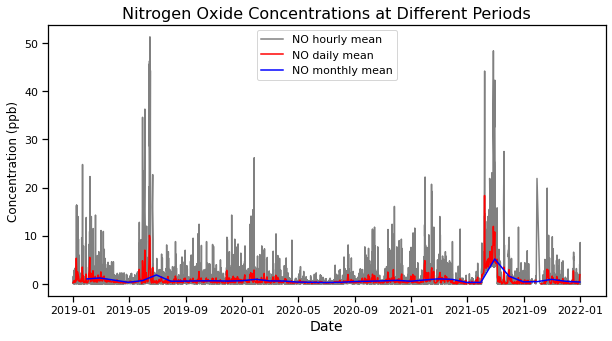

In [21]:
#plot hourly, daily, and monthly periods for air quality
plt.figure(figsize = (10,5))

plt.plot(AQ_data.index, AQ_data['NO'], 'gray', label = 'NO hourly mean')
plt.plot(AQ_data_daily.index, AQ_data_daily['NO'], 'r', label = 'NO daily mean')
plt.plot(AQ_data_monthly.index, AQ_data_monthly['NO'], 'b', label = 'NO monthly mean')

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Concentration (ppb)')
plt.title('Nitrogen Oxide Concentrations at Different Periods', fontsize = 16)
plt.legend()
plt.show()

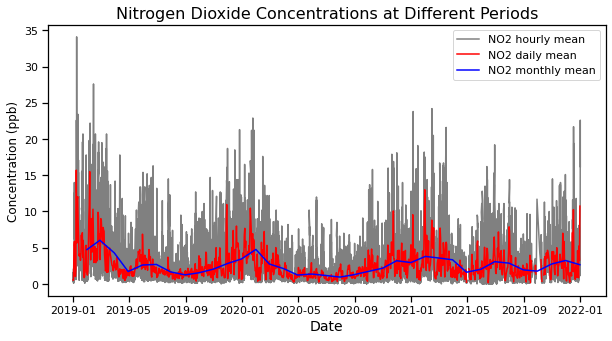

In [22]:
#plot hourly, daily, and monthly periods for air quality
plt.figure(figsize = (10,5))

plt.plot(AQ_data.index, AQ_data['NO2'], 'gray', label = 'NO2 hourly mean')
plt.plot(AQ_data_daily.index, AQ_data_daily['NO2'], 'r', label = 'NO2 daily mean')
plt.plot(AQ_data_monthly.index, AQ_data_monthly['NO2'], 'b', label = 'NO2 monthly mean')

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Concentration (ppb)')
plt.title('Nitrogen Dioxide Concentrations at Different Periods', fontsize = 16)
plt.legend()
plt.show()

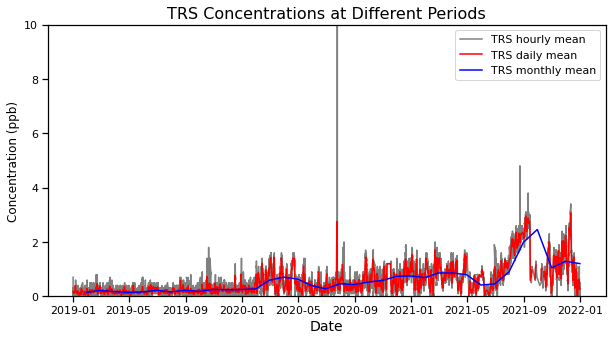

In [23]:
#plot hourly, daily, and monthly periods for air quality
plt.figure(figsize = (10,5))

plt.plot(AQ_data.index, AQ_data['TRS'], 'gray', label = 'TRS hourly mean')
plt.plot(AQ_data_daily.index, AQ_data_daily['TRS'], 'r', label = 'TRS daily mean')
plt.plot(AQ_data_monthly.index, AQ_data_monthly['TRS'], 'b', label = 'TRS monthly mean')

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Concentration (ppb)')
plt.ylim(0, 10)
plt.title('TRS Concentrations at Different Periods', fontsize = 16)
plt.legend()
plt.show()

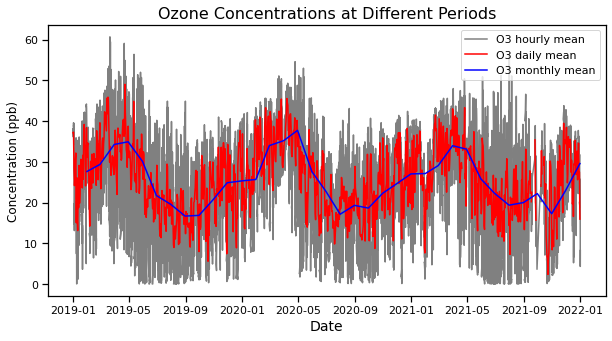

In [24]:
#plot hourly, daily, and monthly periods for air quality
plt.figure(figsize = (10,5))

plt.plot(AQ_data.index, AQ_data['O3'], 'gray', label = 'O3 hourly mean')
plt.plot(AQ_data_daily.index, AQ_data_daily['O3'], 'r', label = 'O3 daily mean')
plt.plot(AQ_data_monthly.index, AQ_data_monthly['O3'], 'blue', label = 'O3 monthly mean')

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Concentration (ppb)')
plt.title('Ozone Concentrations at Different Periods', fontsize = 16)
plt.legend()
plt.show()

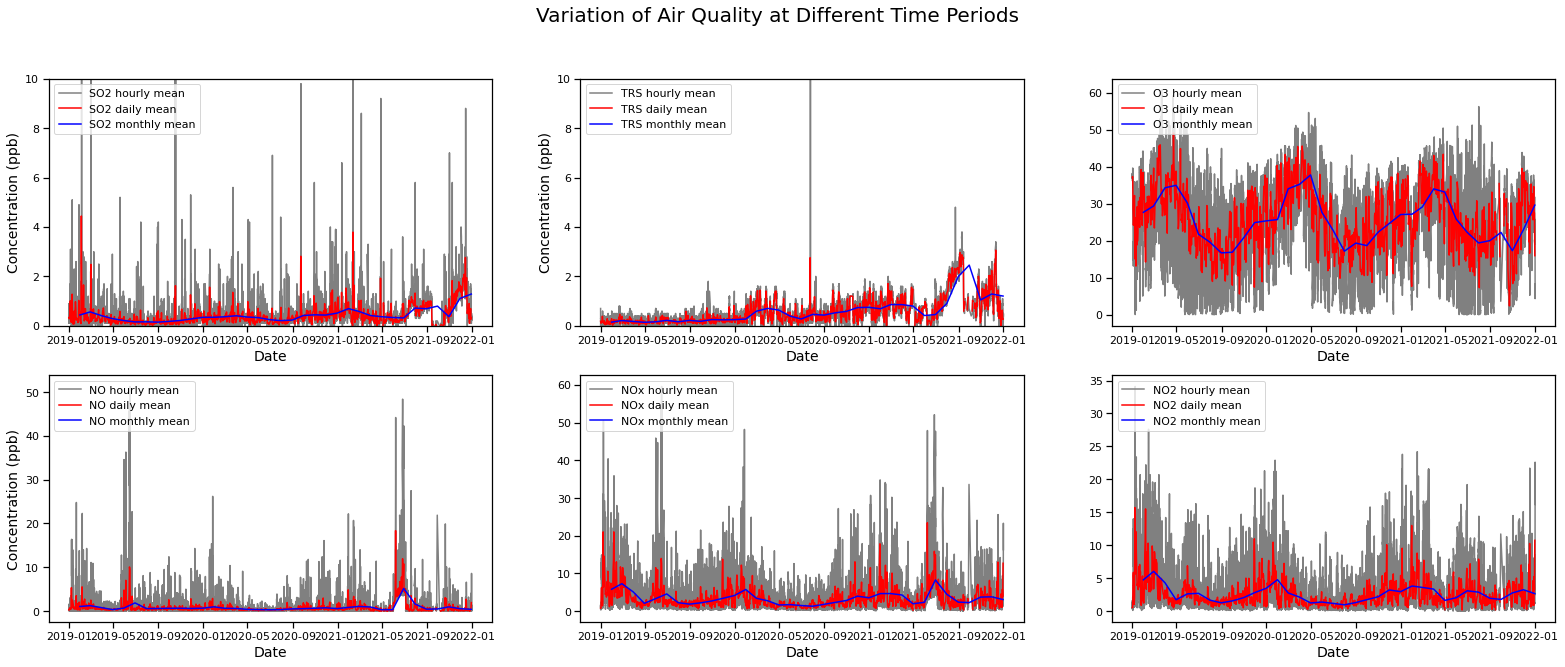

In [26]:
# Plot line plots of AQ components at different time periods
fig, axs = plt.subplots(2,3, figsize=(27,10))
fig.suptitle("Variation of Air Quality at Different Time Periods", fontsize=20)

axs[0,0].plot(AQ_data.index, AQ_data['SO2'], 'gray', label = 'SO2 hourly mean')
axs[0,0].plot(AQ_data_daily.index, AQ_data_daily['SO2'], 'r', label = 'SO2 daily mean')
axs[0,0].plot(AQ_data_monthly.index, AQ_data_monthly['SO2'], 'b', label = 'SO2 monthly mean')
axs[0,0].set_xlabel("Date",fontsize=14)
axs[0,0].set_ylabel("Concentration (ppb)",color="black",fontsize=14)
axs[0,0].legend(loc='upper left')
axs[0,0].set_ylim(0, 10)

axs[0,1].plot(AQ_data.index, AQ_data['TRS'], 'gray', label = 'TRS hourly mean')
axs[0,1].plot(AQ_data_daily.index, AQ_data_daily['TRS'], 'r', label = 'TRS daily mean')
axs[0,1].plot(AQ_data_monthly.index, AQ_data_monthly['TRS'], 'b', label = 'TRS monthly mean')
axs[0,1].set_xlabel("Date",fontsize=14)
axs[0,1].set_ylabel("Concentration (ppb)",color="black",fontsize=14)
axs[0,1].legend(loc='upper left')
axs[0,1].set_ylim(0, 10)

axs[0,2].plot(AQ_data.index, AQ_data['O3'], 'gray', label = 'O3 hourly mean')
axs[0,2].plot(AQ_data_daily.index, AQ_data_daily['O3'], 'r', label = 'O3 daily mean')
axs[0,2].plot(AQ_data_monthly.index, AQ_data_monthly['O3'], 'b', label = 'O3 monthly mean')
axs[0,2].set_xlabel("Date",fontsize=14)
axs[0,2].legend(loc='upper left')

axs[1,0].plot(AQ_data.index, AQ_data['NO'], 'gray', label = 'NO hourly mean')
axs[1,0].plot(AQ_data_daily.index, AQ_data_daily['NO'], 'r', label = 'NO daily mean')
axs[1,0].plot(AQ_data_monthly.index, AQ_data_monthly['NO'], 'b', label = 'NO monthly mean')
axs[1,0].set_xlabel("Date",fontsize=14)
axs[1,0].set_ylabel("Concentration (ppb)",color="black",fontsize=14)
axs[1,0].legend(loc='upper left')

axs[1,1].plot(AQ_data.index, AQ_data['NOx'], 'gray', label = 'NOx hourly mean')
axs[1,1].plot(AQ_data_daily.index, AQ_data_daily['NOx'], 'r', label = 'NOx daily mean')
axs[1,1].plot(AQ_data_monthly.index, AQ_data_monthly['NOx'], 'b', label = 'NOx monthly mean')
axs[1,1].set_xlabel("Date",fontsize=14)
axs[1,1].legend(loc='upper left')

axs[1,2].plot(AQ_data.index, AQ_data['NO2'], 'gray', label = 'NO2 hourly mean')
axs[1,2].plot(AQ_data_daily.index, AQ_data_daily['NO2'], 'r', label = 'NO2 daily mean')
axs[1,2].plot(AQ_data_monthly.index, AQ_data_monthly['NO2'], 'b', label = 'NO2 monthly mean')
axs[1,2].set_xlabel("Date",fontsize=14)
axs[1,2].legend(loc='upper left')
plt.savefig('fig3(1).png')

plt.show()

Based on the hourly, daily, and monthly for all the pollutants, we can see how noisy the data gets when plotting concentrations at smaller time period which causes varation in data. Moving forward, monthly data would be best to represnt air quality

In [20]:
#Resample weather data to daily and monthly period
weather_data = weather_data.set_index('Datetime')
weather_data_daily = weather_data.resample('D').mean()
weather_data_monthly = weather_data.resample('M').mean()

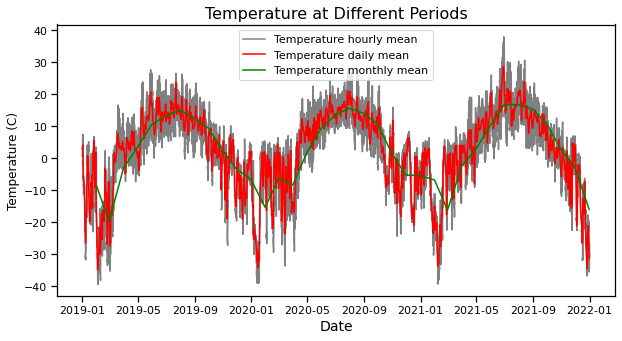

In [21]:
#plot hourly, daily, and monthly periods for temperature
plt.figure(figsize = (10,5))

plt.plot(weather_data.index, weather_data['TEMP_MEAN_(C)'], 'gray', label = 'Temperature hourly mean')
plt.plot(weather_data_daily.index, weather_data_daily['TEMP_MEAN_(C)'], 'r', label = 'Temperature daily mean')
plt.plot(weather_data_monthly.index, weather_data_monthly['TEMP_MEAN_(C)'], 'g', label = 'Temperature monthly mean')

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature (C)')
plt.title('Temperature at Different Periods', fontsize = 16)
plt.legend()
plt.show()

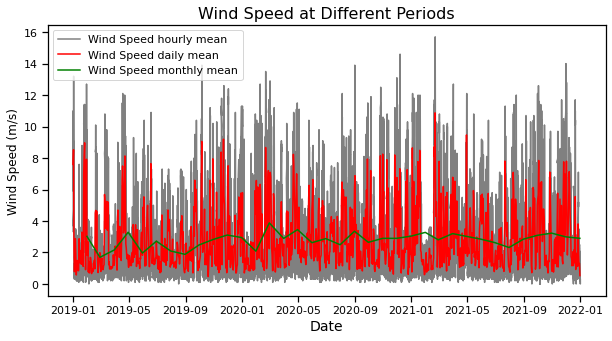

In [22]:
#plot hourly, daily, and monthly periods for wind speed
plt.figure(figsize = (10,5))

plt.plot(weather_data.index, weather_data['WSPD_SCLR_(M/S)'], 'gray', label = 'Wind Speed hourly mean')
plt.plot(weather_data_daily.index, weather_data_daily['WSPD_SCLR_(M/S)'], 'r', label = 'Wind Speed daily mean')
plt.plot(weather_data_monthly.index, weather_data_monthly['WSPD_SCLR_(M/S)'], 'g', label = 'Wind Speed monthly mean')

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed at Different Periods', fontsize = 16)
plt.legend()
plt.show()

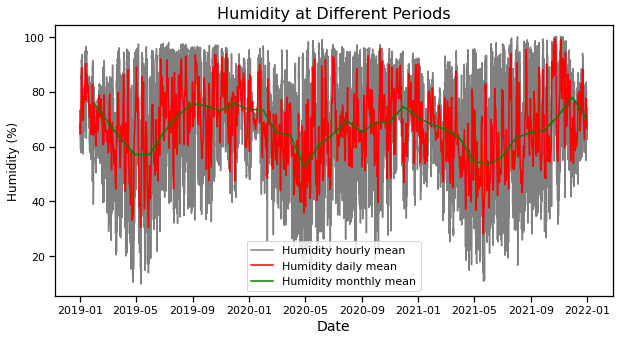

In [23]:
#plot hourly, daily, and monthly periods for humidity
plt.figure(figsize = (10,5))

plt.plot(weather_data.index, weather_data['HUMIDITY_(%)'], 'gray', label = 'Humidity hourly mean')
plt.plot(weather_data_daily.index, weather_data_daily['HUMIDITY_(%)'], 'r', label = 'Humidity daily mean')
plt.plot(weather_data_monthly.index, weather_data_monthly['HUMIDITY_(%)'], 'g', label = 'Humidity monthly mean')

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Humidity (%)')
plt.title('Humidity at Different Periods', fontsize = 16)
plt.legend()
plt.show()

# Monthly Trend

First lets create two dataframes: one has the merged daily values for all our dataset and the other has the monthly values

In [19]:
# read in cleaned weather, air quality, drilling, and production files
# Path of working directory
working_path = os.path.abspath(os.getcwd())
# Path of parent directory
path_one_level_back = os.path.dirname(working_path)
# Define paths for production volume file
path_AQ = os.path.join(path_one_level_back, '2-Analysis', 'FarmingtonCommunityHall_AQ.csv')
path_weather = os.path.join(path_one_level_back, '2-Analysis', 'weather_data.csv')
path_drill = os.path.join(path_one_level_back, '2-Analysis', 'drill_final.csv')
path_prod_daily = os.path.join(path_one_level_back, '2-Analysis', 'production_daily.csv')
path_prod_monthly = os.path.join(path_one_level_back, '2-Analysis', 'production_monthly.csv')
AQ_data =  pd.read_csv(path_AQ, header=[0])
weather_data =  pd.read_csv(path_weather, header=[0])
drill_data =  pd.read_csv(path_drill, header=[0])
production_data_daily =  pd.read_csv(path_prod_daily, header=[0])
production_data_monthly =  pd.read_csv(path_prod_monthly, header=[0])


# combine cleaned file into one dataframe
AQ_weather_hourly = weather_data.merge(right=AQ_data,
                                     how='inner')
# Reset DateTimeIndex
AQ_weather_hourly = AQ_weather_hourly.set_index(pd.DatetimeIndex(AQ_weather_hourly['Datetime']))

# Resample AQ and weather to daily
AQ_weather_daily = AQ_weather_hourly.resample('D').mean()

# Combine daily weather, AQ and drilling and production
drill_data.rename(columns={'Date':'Datetime'}, inplace=True)
drill_data = drill_data.set_index(pd.DatetimeIndex(drill_data['Datetime']))
drill_data.drop('Datetime', axis=1, inplace=True)
AQ_weather_drilling_daily = AQ_weather_daily.merge(right=drill_data,
                                                  how='inner',
                                                  left_index=True,
                                                  right_index=True)

production_data_daily.rename(columns={'Date':'Datetime'}, inplace=True)
production_data_daily = production_data_daily.set_index(pd.DatetimeIndex(production_data_daily['Datetime']))
production_data_daily.drop('Datetime', axis=1, inplace=True)

AQ_weather_drilling_prod_daily = AQ_weather_drilling_daily.merge(right=production_data_daily,
                                                                 how='inner',
                                                                 left_index=True,
                                                                 right_index=True)
# View df
AQ_weather_drilling_prod_daily.head()

,TEMP_MEAN_(C),WDIR_VECT_(DEG),WSPD_SCLR_(M/S),HUMIDITY_(%),NOx,SO2,NO,NO2,TRS,O3,Depth_per_day,gas_prod_vol_m3
Datetime,,,,,,,,,,,,
2019-01-01,2.879167,261.875000,7.595833,68.220833,0.820833,0.333333,0.268750,0.543750,0.183333,37.122917,252.000000,168187.648387
2019-01-02,4.066667,256.179167,8.525000,64.683333,0.739583,0.283333,0.229167,0.510417,0.104167,37.287500,252.000000,168187.648387
2019-01-03,-6.262500,281.950000,2.079167,72.279167,6.056250,0.297917,0.677083,5.362500,0.110417,28.483333,588.502415,168187.648387
2019-01-04,-7.912500,187.333333,0.779167,88.525000,6.258333,0.687500,0.377083,5.879167,0.172917,24.160417,807.002415,168187.648387
2019-01-05,-9.120833,121.070833,1.870833,88.825000,5.381250,1.010417,0.737500,4.652083,0.139583,26.127083,807.002415,168187.648387


In [20]:
# read in cleaned weather, air quality, drilling, and production files
# Path of working directory
working_path = os.path.abspath(os.getcwd())
# Path of parent directory
path_one_level_back = os.path.dirname(working_path)
# Define paths for production volume file
path_AQ = os.path.join(path_one_level_back, '2-Analysis', 'FarmingtonCommunityHall_AQ.csv')
path_weather = os.path.join(path_one_level_back, '2-Analysis', 'weather_data.csv')
path_drill = os.path.join(path_one_level_back, '2-Analysis', 'drill_final.csv')
path_prod_daily = os.path.join(path_one_level_back, '2-Analysis', 'production_daily.csv')
path_prod_monthly = os.path.join(path_one_level_back, '2-Analysis', 'production_monthly.csv')
AQ_data =  pd.read_csv(path_AQ, header=[0])
weather_data =  pd.read_csv(path_weather, header=[0])
drill_data =  pd.read_csv(path_drill, header=[0])
production_data_daily =  pd.read_csv(path_prod_daily, header=[0])
production_data_monthly =  pd.read_csv(path_prod_monthly, header=[0])

# combine cleaned file into one dataframe
AQ_weather_hourly = weather_data.merge(right=AQ_data,
                                     how='inner')
# Reset DateTimeIndex
AQ_weather_hourly = AQ_weather_hourly.set_index(pd.DatetimeIndex(AQ_weather_hourly['Datetime']))

# Resample AQ and weather to daily
AQ_weather_daily = AQ_weather_hourly.resample('M').mean()

# Combine daily weather, AQ and drilling and production
drill_data.rename(columns={'Date':'Datetime'}, inplace=True)
drill_data = drill_data.set_index(pd.DatetimeIndex(drill_data['Datetime']))
drill_data.drop('Datetime', axis=1, inplace=True)
drill_data = drill_data.resample('M').sum()
AQ_weather_drilling_daily = AQ_weather_daily.merge(right=drill_data,
                                                  how='inner',
                                                  left_index=True,
                                                  right_index=True)

production_data_daily.rename(columns={'Date':'Datetime'}, inplace=True)
production_data_daily = production_data_daily.set_index(pd.DatetimeIndex(production_data_daily['Datetime']))
production_data_daily.drop('Datetime', axis=1, inplace=True)
production_data_daily = production_data_daily.resample('M').sum()

AQ_weather_drilling_prod_monthly = AQ_weather_drilling_daily.merge(right=production_data_daily,
                                                                 how='inner',
                                                                 left_index=True,
                                                                 right_index=True)
# View df
AQ_weather_drilling_prod_monthly.head()

,TEMP_MEAN_(C),WDIR_VECT_(DEG),WSPD_SCLR_(M/S),HUMIDITY_(%),NOx,SO2,NO,NO2,TRS,O3,Depth_per_day,gas_prod_vol_m3
Datetime,,,,,,,,,,,,
2019-01-31,-8.364919,225.636962,3.024328,75.877151,5.786626,0.438038,1.044422,4.743817,0.147849,27.624462,98952.575762,5213817.1
2019-02-28,-19.748512,227.183185,1.693452,69.316815,7.262426,0.561086,1.240030,6.024702,0.212054,29.353199,180173.980937,4704358.5
2019-03-31,-3.087097,248.195565,2.157930,62.530780,5.068884,0.409946,0.781788,4.288777,0.174530,34.263306,216898.369108,5223571.0
2019-04-30,3.420625,224.523403,3.285486,57.080972,2.056181,0.290000,0.337431,1.718194,0.142292,34.923264,219187.235484,4807638.7
2019-05-31,10.465188,191.305376,1.963172,57.111156,3.302083,0.211358,0.691868,2.613777,0.160820,30.106384,187231.816727,4561579.5


Lets see the monthly trend of drilling depth

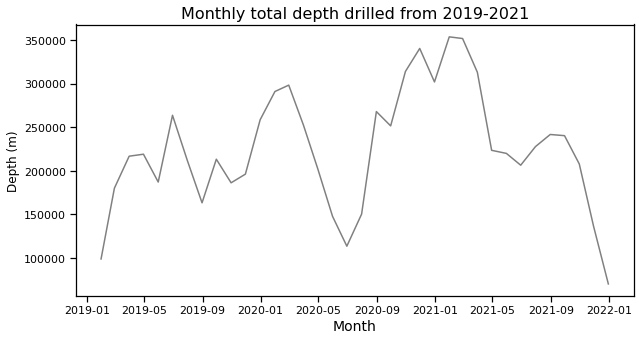

In [21]:
#plot monthly drilling depth trend
plt.figure(figsize = (10,5))

plt.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], 'gray')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Depth (m)')
plt.title('Monthly total depth drilled from 2019-2021', fontsize = 16)
plt.show()

We can see that there is an impact on drilling depth due to the COVID19 pandemic!

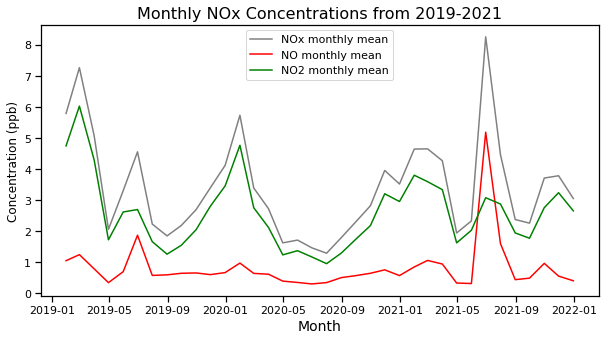

In [22]:
#plot monthly NO, NO2, NOx trend
plt.figure(figsize = (10,5))

plt.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NOx'], 'gray', label = 'NOx monthly mean')
plt.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NO'], 'r', label = 'NO monthly mean')
plt.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NO2'], 'g', label = 'NO2 monthly mean')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Concentration (ppb)')
plt.title('Monthly NOx Concentrations from 2019-2021', fontsize = 16)
plt.legend()
plt.show()

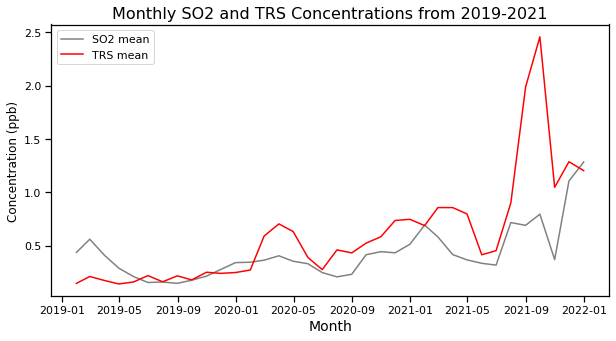

In [28]:
#plot monthly SO2 and TRS trend
plt.figure(figsize = (10,5))

plt.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['SO2'], 'gray', label = 'SO2 mean')
plt.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['TRS'], 'r', label = 'TRS mean')
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Concentration (ppb)')
plt.title('Monthly SO2 and TRS Concentrations from 2019-2021', fontsize = 16)
plt.legend()
plt.show()

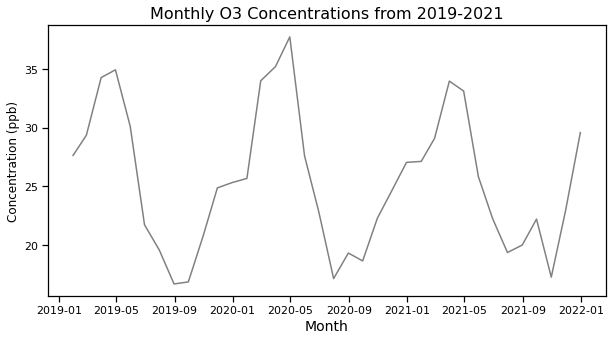

In [47]:
#plot monthly O3 trend
plt.figure(figsize = (10,5))

plt.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['O3'], 'gray')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Concentration (ppb)')
plt.title('Monthly O3 Concentrations from 2019-2021', fontsize = 16)
plt.show()

Now lets see the monthly trends between air quality and drilling depth

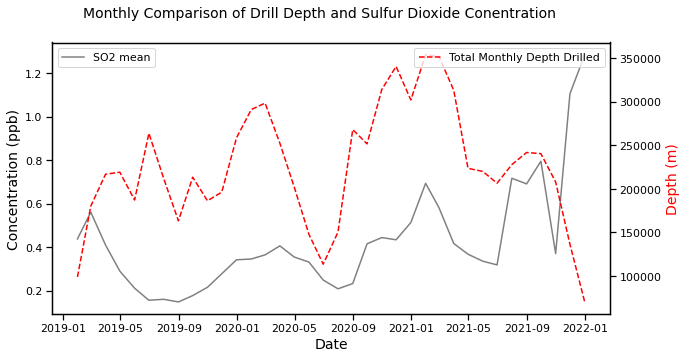

In [23]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['SO2'], 'gray', label = 'SO2 mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
ax2.set_ylabel("Depth (m)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle("Monthly Comparison of Drill Depth and Sulfur Dioxide Conentration ", fontsize=14)
plt.savefig('fig4.png')
plt.show()

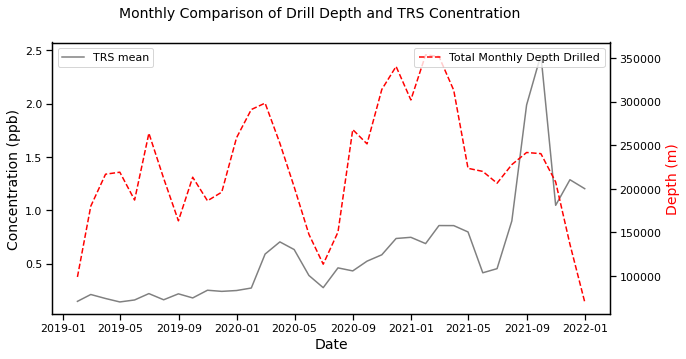

In [49]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['TRS'], 'gray', label = 'TRS mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
ax2.set_ylabel("Depth (m)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle("Monthly Comparison of Drill Depth and TRS Conentration ", fontsize=14)
plt.show()

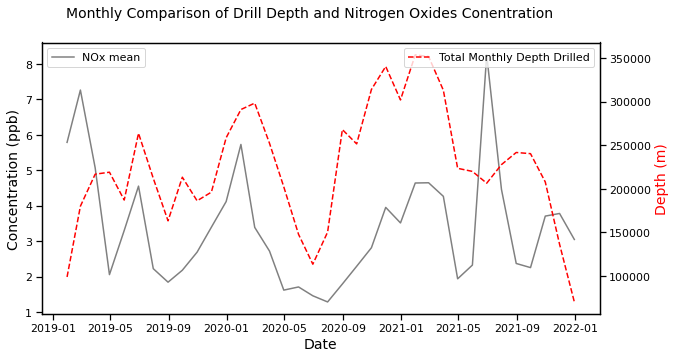

In [50]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NOx'], 'gray', label = 'NOx mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
ax2.set_ylabel("Depth (m)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle("Monthly Comparison of Drill Depth and Nitrogen Oxides Conentration ", fontsize=14)
plt.show()

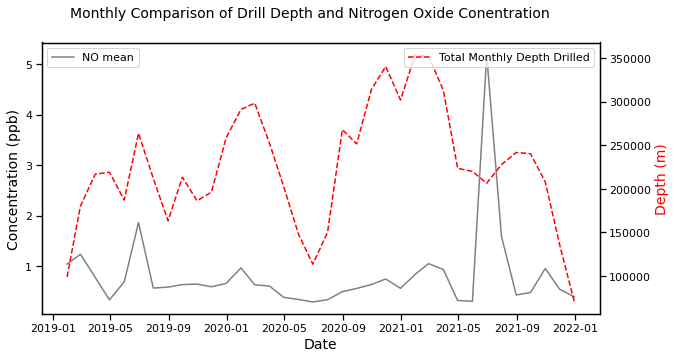

In [51]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NO'], 'gray', label = 'NO mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'],  linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
ax2.set_ylabel("Depth (m)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle("Monthly Comparison of Drill Depth and Nitrogen Oxide Conentration ", fontsize=14)
plt.show()

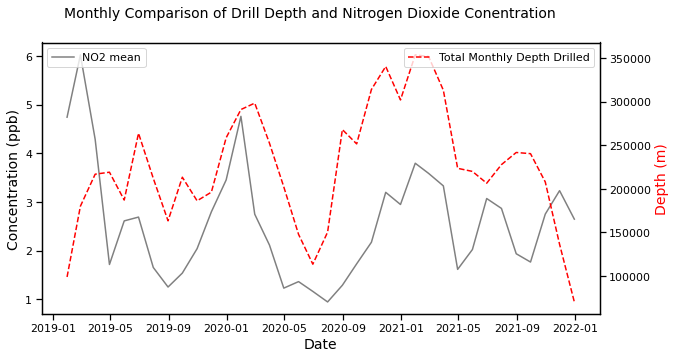

In [52]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NO2'], 'gray', label = 'NO2 mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
ax2.set_ylabel("Depth (m)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle("Monthly Comparison of Drill Depth and Nitrogen Dioxide Conentration ", fontsize=14)
plt.show()

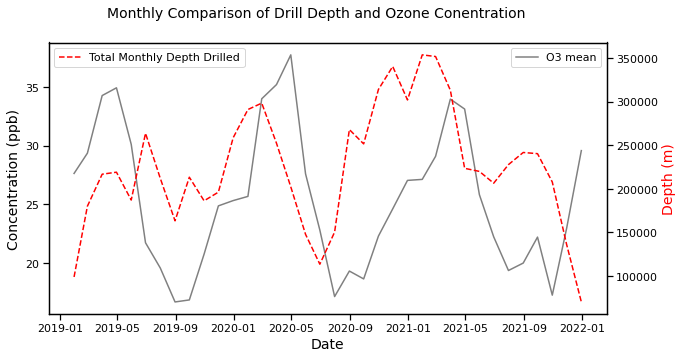

In [53]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['O3'], 'gray', label = 'O3 mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
ax2.set_ylabel("Depth (m)",color="r",fontsize=14)
ax.legend()
ax2.legend()
fig.suptitle("Monthly Comparison of Drill Depth and Ozone Conentration ", fontsize=14)
plt.show()

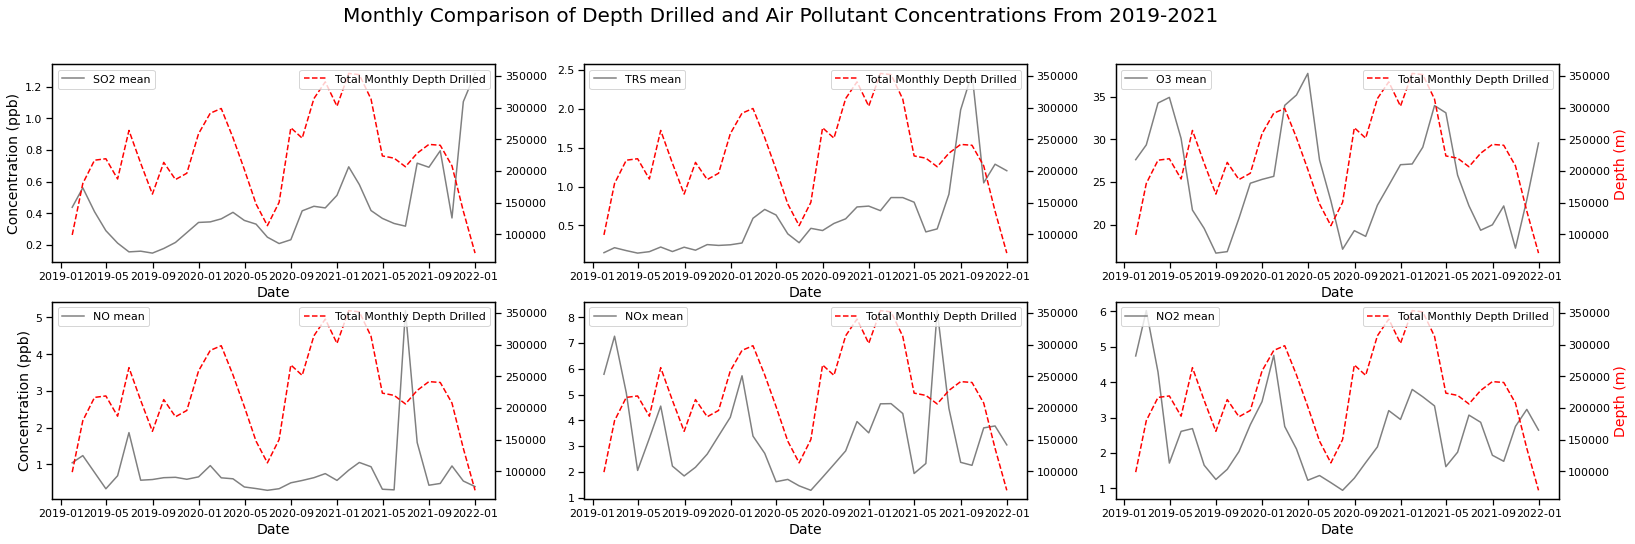

In [26]:
# Plot line plot of monthly data for depth drilled against air quality
fig, axs = plt.subplots(2,3, figsize=(27,8))
fig.suptitle("Monthly Comparison of Depth Drilled and Air Pollutant Concentrations From 2019-2021", fontsize=20)

axs[0,0].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['SO2'], 'gray', label = 'SO2 mean')
ax2=axs[0,0].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
axs[0,0].set_xlabel("Date",fontsize=14)
axs[0,0].set_ylabel("Concentration (ppb)",color="black",fontsize=14)
axs[0,0].legend(loc='upper left')
ax2.legend(loc='upper right')

axs[0,1].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['TRS'], 'gray', label = 'TRS mean')
ax2=axs[0,1].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
axs[0,1].set_xlabel("Date",fontsize=14)
axs[0,1].legend(loc='upper left')
ax2.legend(loc='upper right')

axs[0,2].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['O3'], 'gray', label = 'O3 mean')
ax2=axs[0,2].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
axs[0,2].set_xlabel("Date",fontsize=14)
ax2.set_ylabel("Depth (m)",color="r",fontsize=14)
axs[0,2].legend(loc='upper left')
ax2.legend(loc='upper right')

axs[1,0].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NO'], 'gray', label = 'NO mean')
ax2=axs[1,0].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
axs[1,0].set_xlabel("Date",fontsize=14)
axs[1,0].set_ylabel("Concentration (ppb)",color="black",fontsize=14)
axs[1,0].legend(loc='upper left')
ax2.legend(loc='upper right')

axs[1,1].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NOx'], 'gray', label = 'NOx mean')
ax2=axs[1,1].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
axs[1,1].set_xlabel("Date",fontsize=14)
axs[1,1].legend(loc='upper left')
ax2.legend(loc='upper right')

axs[1,2].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NO2'], 'gray', label = 'NO2 mean')
ax2=axs[1,2].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
axs[1,2].set_xlabel("Date",fontsize=14)
ax2.set_ylabel("Depth (m)",color="r",fontsize=14)
axs[1,2].legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig('fig5.png')
plt.show()

Based on the plots, we can see there is a trend between AQ and drilling depth, especailly with NO2,NOX and O3

Now lets see the gas production volume monthly trends

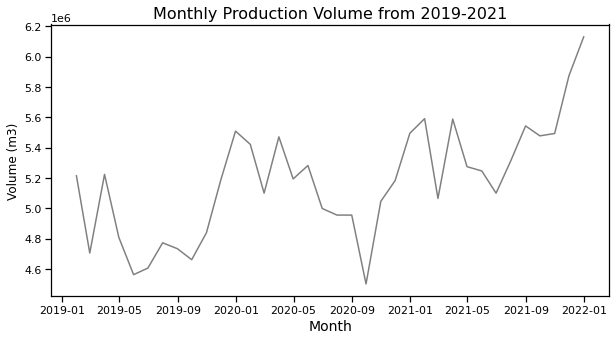

In [54]:
#plot monthly production trend
plt.figure(figsize = (10,5))

plt.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], 'gray')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Volume (m3)')
plt.title('Monthly Production Volume from 2019-2021', fontsize = 16)
plt.show()

The trend for the impact due to the pandemic is not the clear as with the drilling data

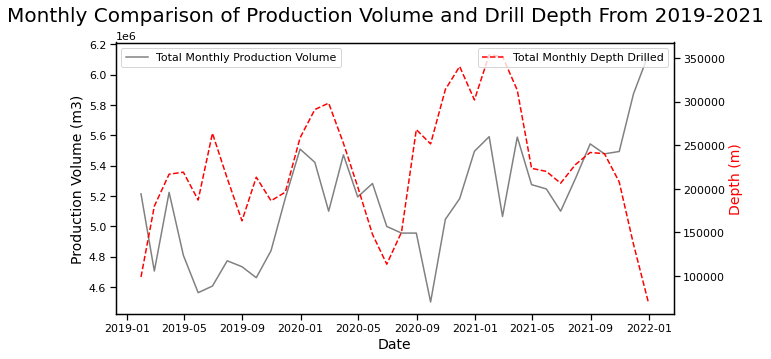

In [55]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10,5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], 'gray', label = 'Total Monthly Production Volume')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Production Volume (m3)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['Depth_per_day'], linestyle='dashed', color = 'r', label = 'Total Monthly Depth Drilled')
ax2.set_ylabel("Depth (m)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set(facecolor = "white")
fig.suptitle("Monthly Comparison of Production Volume and Drill Depth From 2019-2021" , fontsize=20)
plt.show()

Now lets see the monthly trends between air quality and gas production volume

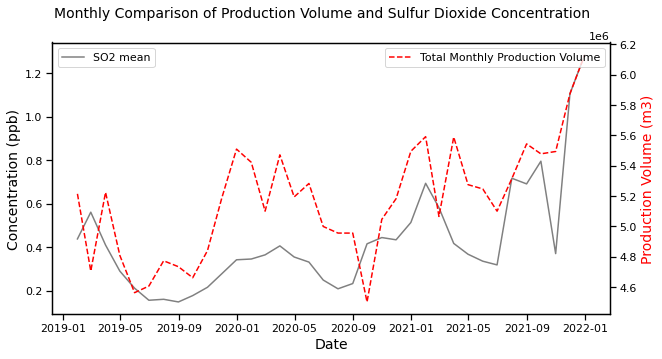

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['SO2'], 'gray', label = 'SO2 mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
ax2.set_ylabel("Production Volume (m3)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle("Monthly Comparison of Production Volume and Sulfur Dioxide Concentration", fontsize=14)
plt.show()

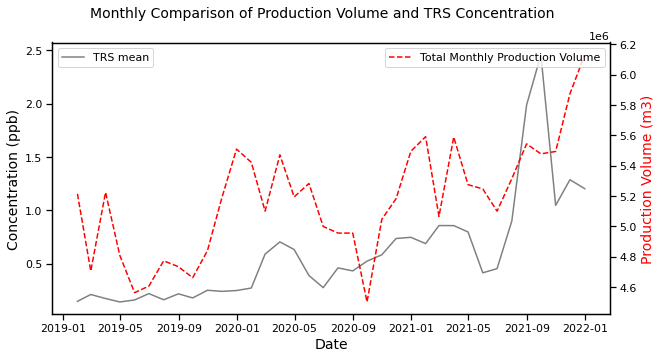

In [57]:
fig, ax = plt.subplots(figsize=(10, 5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['TRS'], 'gray', label = 'TRS mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
ax2.set_ylabel("Production Volume (m3)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle("Monthly Comparison of Production Volume and TRS Concentration", fontsize=14)
plt.show()

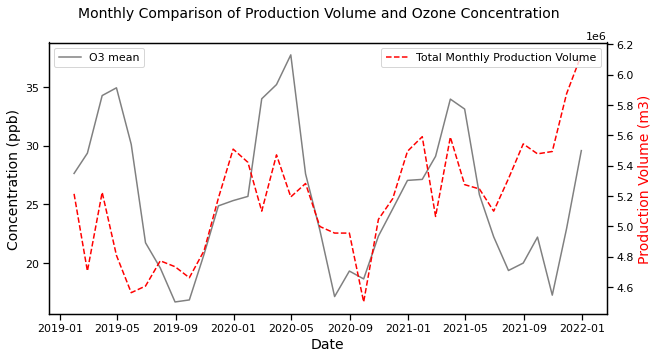

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['O3'], 'gray', label = 'O3 mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
ax2.set_ylabel("Production Volume (m3)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle("Monthly Comparison of Production Volume and Ozone Concentration", fontsize=14)
plt.show()

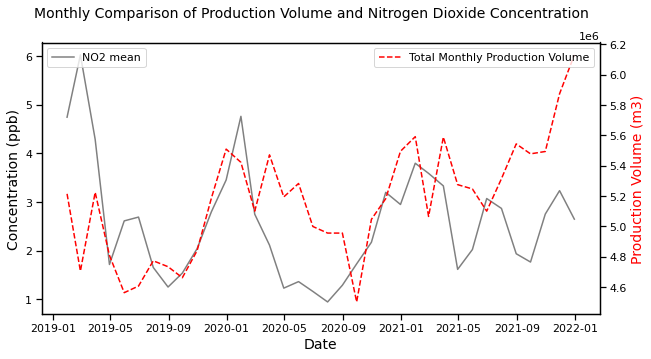

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NO2'], 'gray', label = 'NO2 mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
ax2.set_ylabel("Production Volume (m3)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle("Monthly Comparison of Production Volume and Nitrogen Dioxide Concentration", fontsize=14)
plt.show()

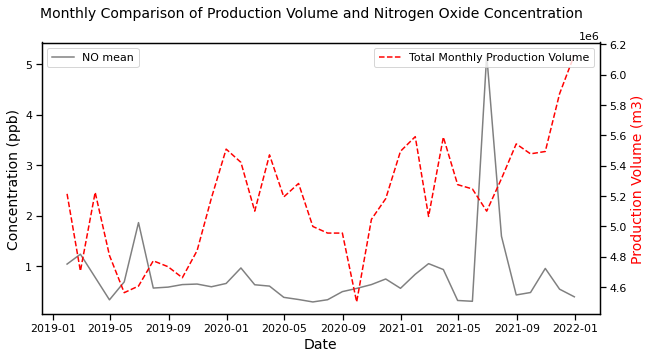

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NO'], 'gray', label = 'NO mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
ax2.set_ylabel("Production Volume (m3)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle("Monthly Comparison of Production Volume and Nitrogen Oxide Concentration", fontsize=14)
plt.show()

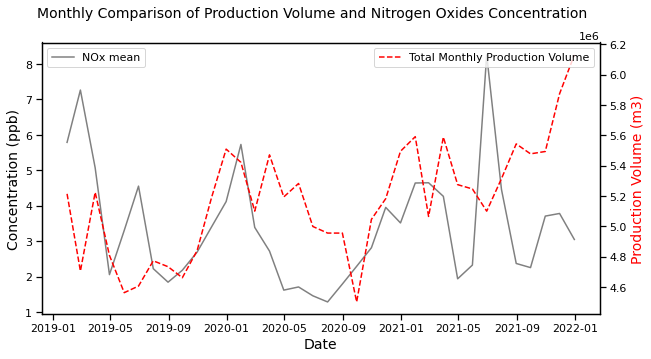

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))
# make a plot
ax.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NOx'], 'gray', label = 'NOx mean')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Concentration (ppb)",color="black",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
ax2.set_ylabel("Production Volume (m3)",color="r",fontsize=14)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.suptitle("Monthly Comparison of Production Volume and Nitrogen Oxides Concentration", fontsize=14)
plt.show()

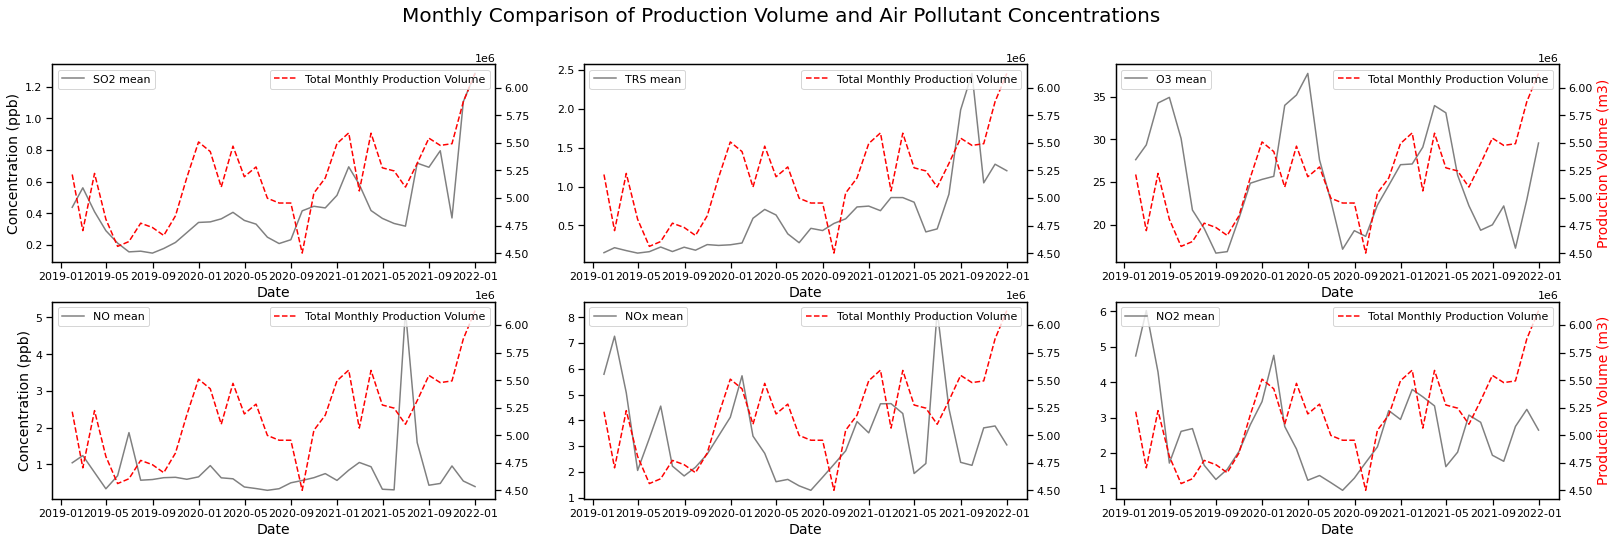

In [28]:
# Plot line plot of monthly data for production volume against air quality
fig, axs = plt.subplots(2,3, figsize=(27,8))
fig.suptitle("Monthly Comparison of Production Volume and Air Pollutant Concentrations", fontsize=20)

axs[0,0].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['SO2'], 'gray', label = 'SO2 mean')
ax2=axs[0,0].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
axs[0,0].set_xlabel("Date",fontsize=14)
axs[0,0].set_ylabel("Concentration (ppb)",color="black",fontsize=14)
axs[0,0].legend(loc='upper left')
ax2.legend(loc='upper right')

axs[0,1].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['TRS'], 'gray', label = 'TRS mean')
ax2=axs[0,1].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
axs[0,1].set_xlabel("Date",fontsize=14)
axs[0,1].legend(loc='upper left')
ax2.legend(loc='upper right')

axs[0,2].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['O3'], 'gray', label = 'O3 mean')
ax2=axs[0,2].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
axs[0,2].set_xlabel("Date",fontsize=14)
ax2.set_ylabel("Production Volume (m3)",color="r",fontsize=14)
axs[0,2].legend(loc='upper left')
ax2.legend(loc='upper right')

axs[1,0].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NO'], 'gray', label = 'NO mean')
ax2=axs[1,0].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
axs[1,0].set_xlabel("Date",fontsize=14)
axs[1,0].set_ylabel("Concentration (ppb)",color="black",fontsize=14)
axs[1,0].legend(loc='upper left')
ax2.legend(loc='upper right')

axs[1,1].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NOx'], 'gray', label = 'NOx mean')
ax2=axs[1,1].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
axs[1,1].set_xlabel("Date",fontsize=14)
axs[1,1].legend(loc='upper left')
ax2.legend(loc='upper right')

axs[1,2].plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['NO2'], 'gray', label = 'NO2 mean')
ax2=axs[1,2].twinx()
ax2.plot(AQ_weather_drilling_prod_monthly.index, AQ_weather_drilling_prod_monthly['gas_prod_vol_m3'], linestyle='dashed', color = 'r', label = 'Total Monthly Production Volume')
axs[1,2].set_xlabel("Date",fontsize=14)
ax2.set_ylabel("Production Volume (m3)",color="r",fontsize=14)
axs[1,2].legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig('fig6.png')
plt.show()

We can see a trend between air quality and production volume especailly with TRS and SO2

# Now that we visualized weather, air quality, drilling depth, and production volume, we can see some trends between the data and this will help us study the correlation even more for the model